In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras import layers
from keras import models

In [4]:
train_dir="/content/drive/MyDrive/Driver_Distraction_Detection/train"
validation_dir="/content/drive/MyDrive/Driver_Distraction_Detection/validation"

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=10,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=10,class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 4900 images belonging to 10 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [8]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

model.save('Detection.h5')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 905s 9s/step - loss: 2.3011 - acc: 0.9000 - val_loss: 2.2976 - val_acc: 0.9000
Epoch 2/30
100/100 [==============================] - 819s 8s/step - loss: 2.2521 - acc: 0.9000 - val_loss: 2.3737 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 720s 7s/step - loss: 1.8254 - acc: 0.9016 - val_loss: 2.8737 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 667s 7s/step - loss: 1.5591 - acc: 0.9085 - val_loss: 3.8078 - val_acc: 0.8588
Epoch 5/30
100/100 [==============================] - 616s 6s/step - loss: 1.2202 - acc: 0.9234 - val_loss: 3.3179 - val_acc: 0.8646
Epoch 6/30
100/100 [==============================] - 530s 5s/step - loss: 0.9572 - acc: 0.9344 - val_loss: 4.5427 - val_acc: 0.8494
Epoch 7/30
100/100 [==============================] - 512s 5s/step - loss: 0.6655 - acc: 0.9574 - val_loss: 4.4782 - val_acc: 0.8622
Epoch 8/30
100/100 [==============================] - 448s 5s/step - 

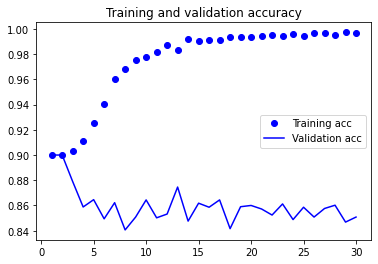

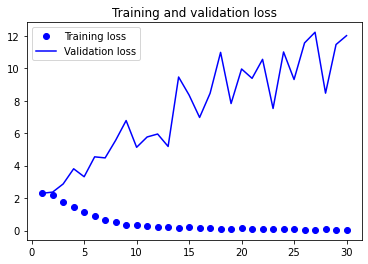

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
